In [1]:
import sys
import io
import matplotlib.pyplot as plt

class DisplayLossCurve(object):
  def __init__(self, print_loss=False):
    self.print_loss = print_loss

  """Make sure the model verbose is set to 1"""
  def __enter__(self):
    self.old_stdout = sys.stdout
    sys.stdout = self.mystdout = io.StringIO()
  
  def __exit__(self, *args, **kwargs):
    sys.stdout = self.old_stdout
    loss_history = self.mystdout.getvalue()
    loss_list = []
    for line in loss_history.split('\n'):
      if(len(line.split("loss: ")) == 1):
        continue
      loss_list.append(float(line.split("loss: ")[-1]))
    plt.figure()
    plt.plot(np.arange(len(loss_list)), loss_list)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")

    if self.print_loss:
      print("=============== Loss Array ===============")
      print(np.array(loss_list))
      
    return True


=============== Loss Array ===============
[0.153546 0.124115 0.120718 0.12027  0.11983  0.119309 0.119055 0.118587]


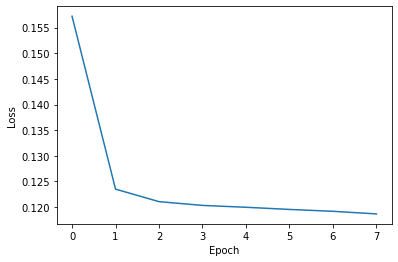

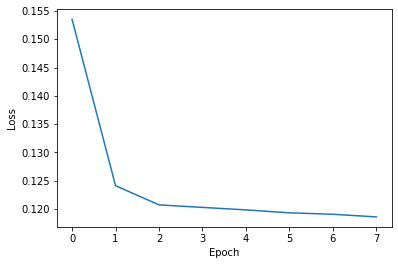

In [2]:
from sklearn.linear_model import SGDRegressor
import numpy as np

X = np.random.rand(100, 10)
Y = np.random.randint(0, 2, size=(100,))

model = SGDRegressor(verbose=1)

with DisplayLossCurve():
  model.fit(X, Y)

# OR

with DisplayLossCurve(print_loss=True):
  model.fit(X, Y)
